# **ANÁLISIS ITERATIVO DE LAS CATEGORÍAS IDEOLÓGICAS EN WIKIPEDIA**
#### Ramón Zamora, carné 10233

## INTRODUCCIÓN
El presente proyecto utiliza herramientas de análisis de texto computacional para llevar a cabo un exploración de los datos de los artículos vinculados a las categorías de distintas ideologías que se pueden encontrar en la enciclopedia digial Wikipedia. Para llevar a cabo este ejercicio se utilizarán las librerías de ...

In [3]:
import wikipediaapi
import pickle
from pprint import pprint
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dcss.text import bigram_process, preprocess, bow_to_df
from dcss.plotting import format_axes_commas, custom_seaborn
from dcss.utils import sparse_groupby
custom_seaborn()
import spacy
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import scipy
from itertools import islice

In [4]:
wiki_wiki = wikipediaapi.Wikipedia('Ciencias Sociales Computacionales (ramonzamora89@gmail.com)', 'en')

In [5]:
#1. Busqueda de Anarquismo
cat_anarchism = wiki_wiki.page("Category:Anarchism")
print("Anarchism exist: %s" % cat_anarchism.exists())
# 2. Busqueda de Autoritarismo
cat_authoritarianism = wiki_wiki.page("Category:Authoritarianism")
print("Authoritarianism exist: %s" % cat_authoritarianism.exists())
# 3. Busqueda de Pensamiento comunitario
cat_communitarianism = wiki_wiki.page("Category:Communitarianism")
print("Communitarianism exist: %s" % cat_communitarianism.exists())
# 4. Busqueda de Comunismo
cat_communism = wiki_wiki.page("Category:Communism")
print("Communism exist: %s" % cat_communism.exists())
# 5. Busqueda de Conservadurismo
cat_conservatism = wiki_wiki.page("Category:Conservatism")
print("Conservatism exist: %s" % cat_conservatism.exists())
# 6. Busqueda de Corporativismo
cat_corporatism = wiki_wiki.page("Category:Corporatism")
print("Corporatism exist: %s" % cat_corporatism.exists())
# 7. Busqueda de Ambiantalismo
cat_environmentalism = wiki_wiki.page("Category:Environmentalism")
print("Environmentalism exist: %s" % cat_environmentalism.exists())
# 8. Busqueda de Facismo
cat_fascism = wiki_wiki.page("Category:Fascism")
print("Fascism exist: %s" % cat_fascism.exists())
# 9. Fascism de Liberalismo
cat_liberalism = wiki_wiki.page("Category:Liberalism")
print("Liberalism exist: %s" % cat_liberalism.exists())
# 10. Busqueda de Libterarismo
cat_libertarianism = wiki_wiki.page("Category:Libertarianism")
print("Libertarianism exist: %s" % cat_libertarianism.exists())
# 11. Busqueda de Nacionalismo
cat_nationalism = wiki_wiki.page("Category:Nationalism")
print("Nationalism exist: %s" % cat_nationalism.exists())
# 12. Busqueda de Populismo
cat_populism = wiki_wiki.page("Category:Populism")
print("Populism exist: %s" % cat_populism.exists())

Anarchism exist: True
Authoritarianism exist: True
Communitarianism exist: True
Communism exist: True
Conservatism exist: True
Corporatism exist: True
Environmentalism exist: True
Fascism exist: True
Liberalism exist: True
Libertarianism exist: True
Nationalism exist: True
Populism exist: True


In [6]:
data = []
pages_names = cat_anarchism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_anarchism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary': page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_authoritarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_authoritarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communitarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communitarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_communism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_communism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_conservatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_conservatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_corporatism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_corporatism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_environmentalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_environmentalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_fascism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_fascism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_liberalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_liberalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_libertarianism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_libertarianism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_nationalism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_nationalism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )

pages_names = cat_populism.categorymembers
for key, value in islice (pages_names.items(), 1, None):
    page_py = wiki_wiki.page(key)
    data.append(
        {
            'Category': cat_populism,
            'Namespace': page_py.ns,
            'Title': page_py.title,
            'Summary':page_py.summary,
            'Content': page_py.sections
        }
    )


df = pd.DataFrame(data)

In [7]:
df.to_csv('../data/ideologías.csv')

In [8]:
columns = ['Category', 'Namespace', 'Title', 'Summary', 'Content']
wiki_df = pd.read_csv('../data/ideologías.csv')
wiki_df.dropna(subset = ['Title', 'Summary'], inplace=True)
wiki_df =wiki_df.query('Namespace < 1')
wiki_df['Category'].value_counts()

Category:Authoritarianism (id: 36055803, ns: 14)    157
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              96
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                68
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [9]:
content_keep = [
    'Category:Authoritarianism (id: 36055803, ns: 14)',
    'Category:Environmentalism (id: 737047, ns: 14)',
    'Category:Liberalism (id: 724440, ns: 14)',
    'Category:Communism (id: 722710, ns: 14)',
    'Category:Nationalism (id: 846456, ns: 14)',
    'Category:Conservatism (id: 780171, ns: 14)',
    'Category:Corporatism (id: 21722509, ns: 14)',
    'Category:Fascism (id: 889991, ns: 14)',
    'Category:Populism (id: 19997168, ns: 14)',
    'Category:Anarchism (id: 780754, ns: 14)',
    'Category:Libertarianism (id: 1543366, ns: 14)',
    'Category:Communitarianism (id: 49526307, ns: 14)'
]
content_subset = wiki_df[wiki_df['Category'].isin(content_keep)].copy()
content_subset.reset_index(drop=True, inplace=True)
total_content_counts = content_subset['Category'].value_counts()
total_content_counts

Category:Authoritarianism (id: 36055803, ns: 14)    157
Category:Environmentalism (id: 737047, ns: 14)      124
Category:Liberalism (id: 724440, ns: 14)            108
Category:Communism (id: 722710, ns: 14)              96
Category:Nationalism (id: 846456, ns: 14)            87
Category:Conservatism (id: 780171, ns: 14)           75
Category:Corporatism (id: 21722509, ns: 14)          73
Category:Fascism (id: 889991, ns: 14)                68
Category:Populism (id: 19997168, ns: 14)             62
Category:Anarchism (id: 780754, ns: 14)              44
Category:Libertarianism (id: 1543366, ns: 14)        39
Category:Communitarianism (id: 49526307, ns: 14)     16
Name: Category, dtype: int64

In [10]:
sampled_contents = content_subset.groupby('Category').sample(replace=False, frac=.1, random_state=23)
len(sampled_contents)

96

In [11]:
with open('../data/pickles/sampled_wiki_ideologias_content.pkl', 'wb') as fp:
    pickle.dump(sampled_contents, fp)
sampled_contents_counts = sampled_contents['Category'].value_counts()
sample_sizes = pd.DataFrame(zip(total_content_counts, sampled_contents_counts), columns=['Total', 'Sample'], index=content_keep)

In [12]:
sampled_contents['content_len'] = sampled_contents['Content'].apply(lambda x: len(x.split()))

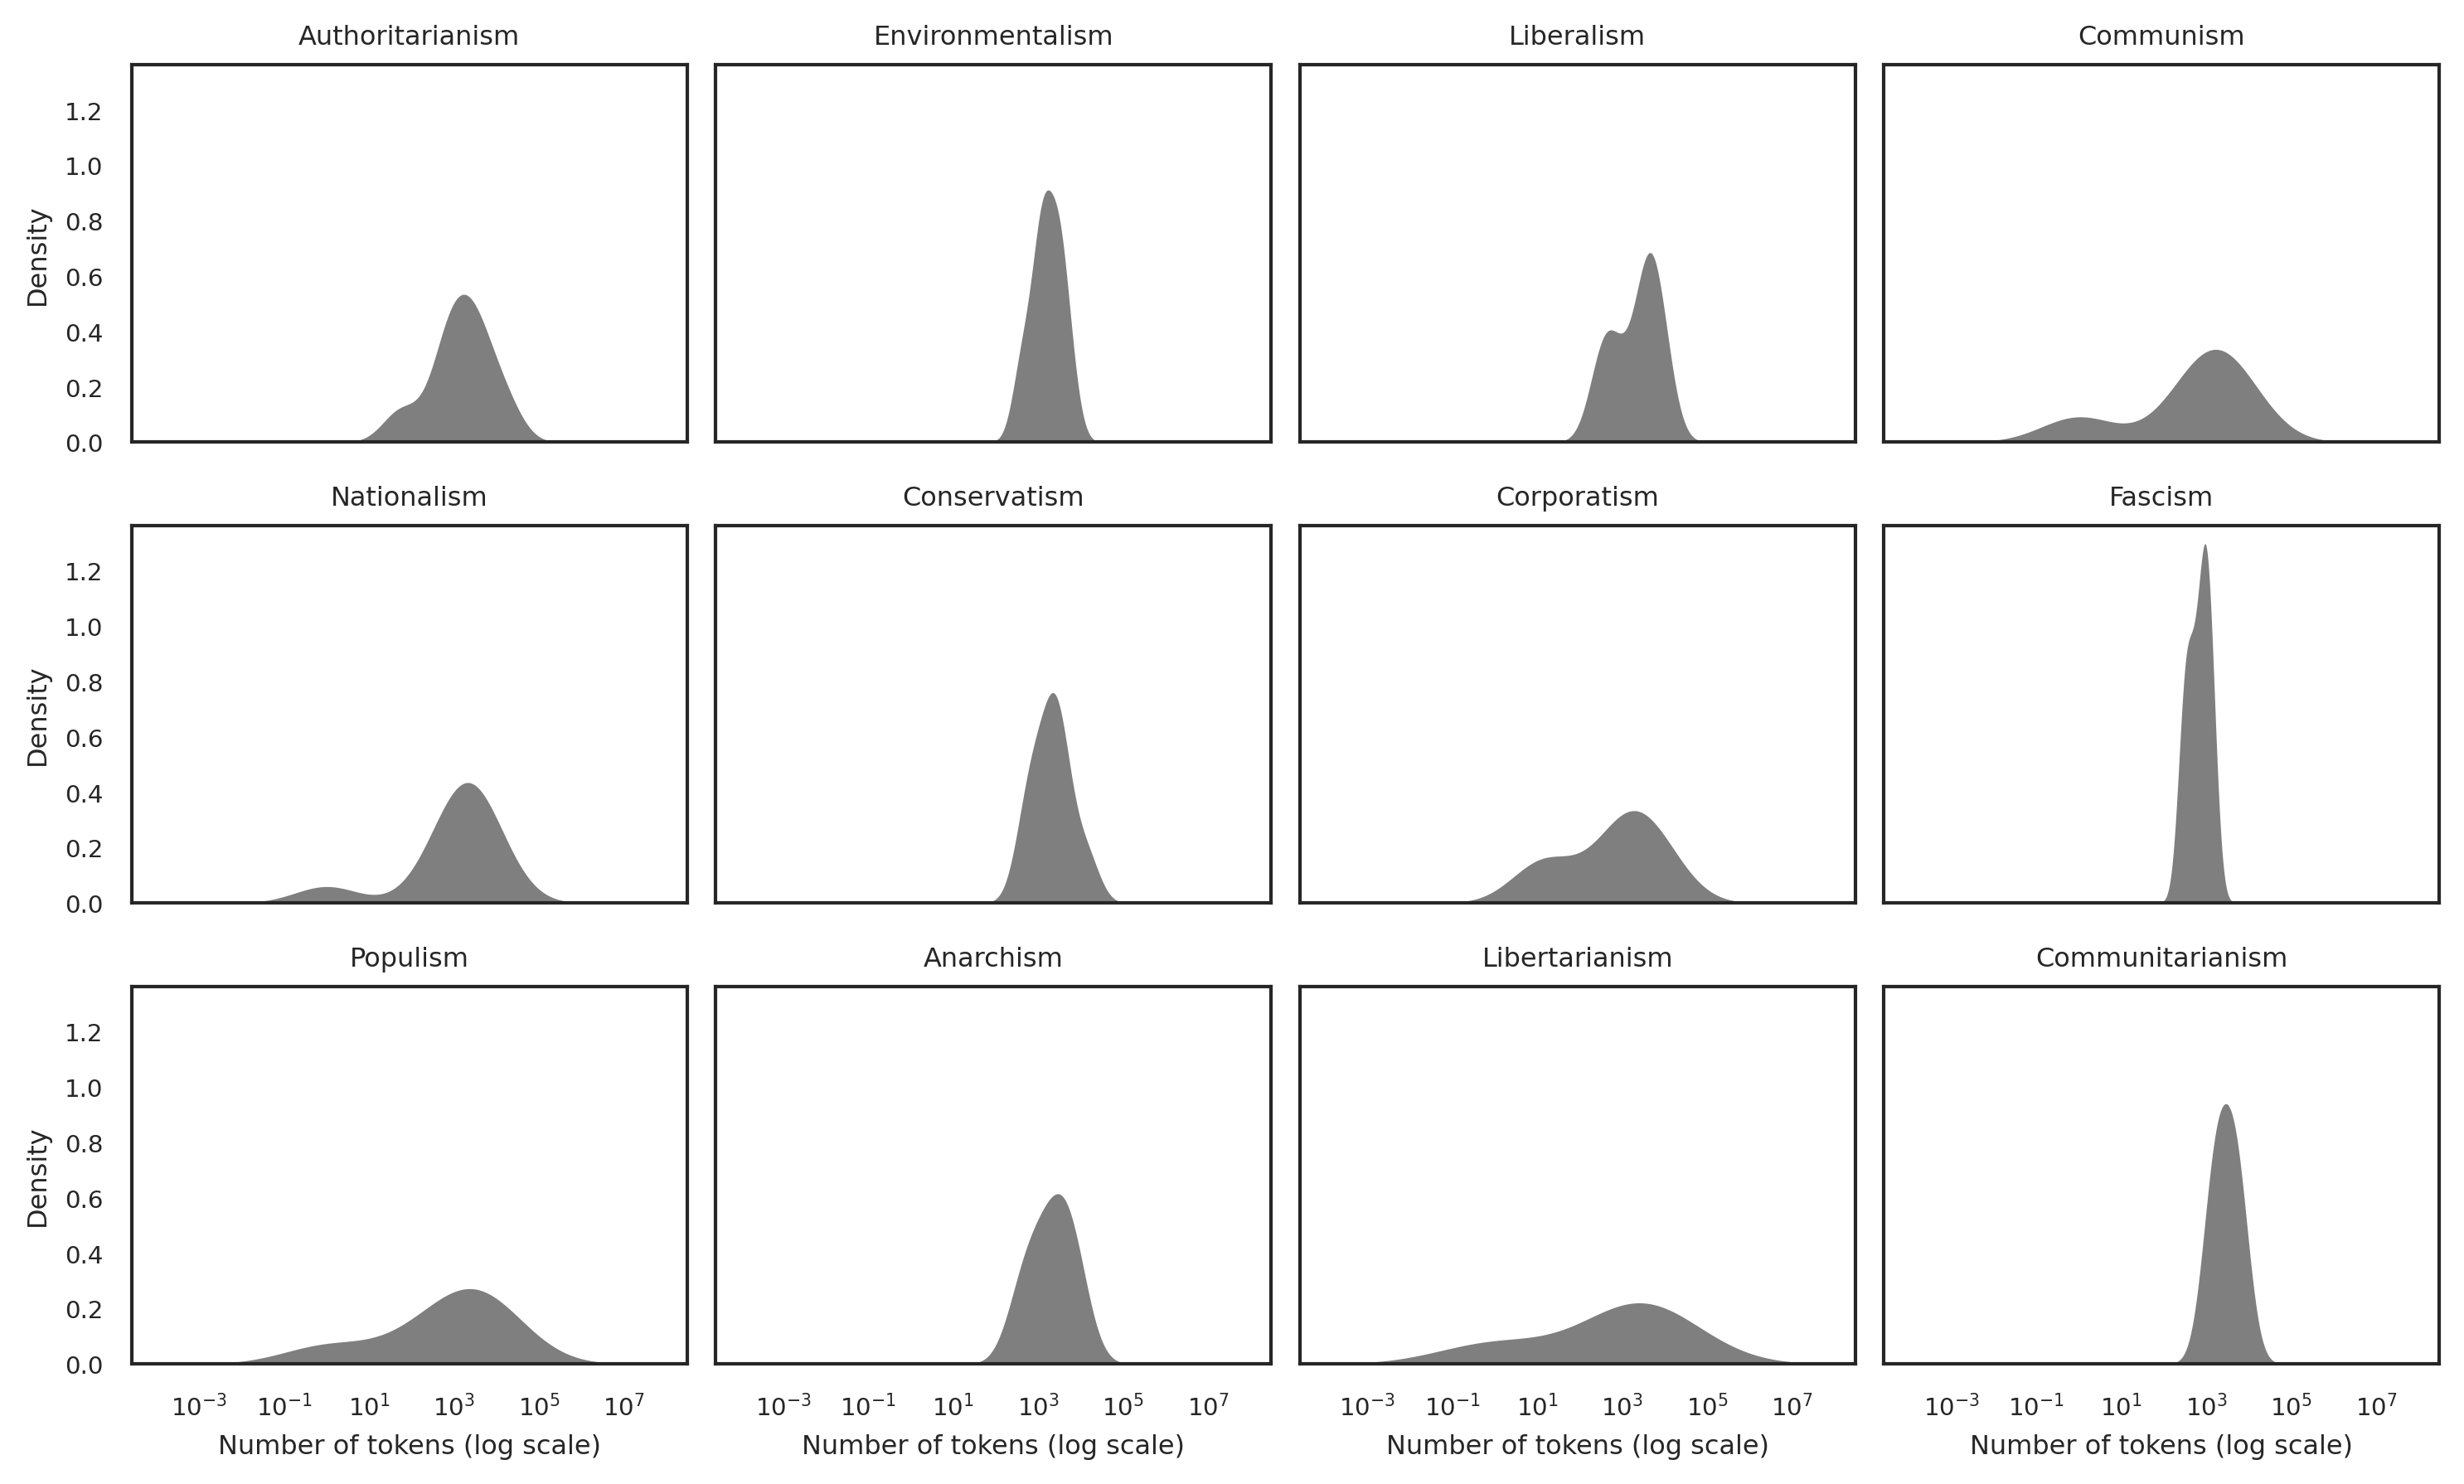

In [13]:
categories = sampled_contents.groupby('Category')
def categoria_subplot(subgroup, title, position):
    sns.kdeplot(ax = position, data=subgroup, x='content_len', log_scale=True, fill=True, alpha=.5, linewidth=0, color='black') 
    position.set(xlabel='Number of tokens (log scale)', title=title)
fig, ax = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(10, 6))

categoria_subplot(categories.get_group('Category:Authoritarianism (id: 36055803, ns: 14)'), 'Authoritarianism', ax[0,0])
categoria_subplot(categories.get_group('Category:Environmentalism (id: 737047, ns: 14)'), 'Environmentalism', ax[0,1])
categoria_subplot(categories.get_group('Category:Liberalism (id: 724440, ns: 14)'), 'Liberalism', ax[0,2])
categoria_subplot(categories.get_group('Category:Communism (id: 722710, ns: 14)'), 'Communism', ax[0,3])
categoria_subplot(categories.get_group('Category:Nationalism (id: 846456, ns: 14)'),'Nationalism', ax[1,0])
categoria_subplot(categories.get_group('Category:Conservatism (id: 780171, ns: 14)'), 'Conservatism', ax[1,1])
categoria_subplot(categories.get_group('Category:Corporatism (id: 21722509, ns: 14)'), 'Corporatism', ax[1,2])
categoria_subplot(categories.get_group('Category:Fascism (id: 889991, ns: 14)'), 'Fascism', ax[1,3])
categoria_subplot(categories.get_group('Category:Populism (id: 19997168, ns: 14)'),'Populism', ax[2,0])
categoria_subplot(categories.get_group('Category:Anarchism (id: 780754, ns: 14)'), 'Anarchism', ax[2,1])
categoria_subplot(categories.get_group('Category:Libertarianism (id: 1543366, ns: 14)'), 'Libertarianism', ax[2,2])
categoria_subplot(categories.get_group('Category:Communitarianism (id: 49526307, ns: 14)'), 'Communitarianism', ax[2,3])

plt.tight_layout()
plt.show()
fig.savefig("graficadensidadWiki")

In [14]:
bigram_model, preprocessed = preprocess(sampled_contents['Content'], nlp=nlp, bigrams= True, detokenize = True, n_process=4)

In [30]:
len(preprocessed)

96

In [31]:
with open('../data/pickles/processed_sample_contents.pkl', 'wb') as fp:
    pickle.dump(preprocessed, fp)

with open('../data/pickles/sample_contents_bigram_model.pkl', 'wb') as fp:
    pickle.dump(bigram_model, fp)

with open('../data/pickles/processed_sample_contents.pkl', 'rb') as fp:
    preprocessed = pickle.load(fp)

In [17]:
sampled_contents.iloc[90]['Content']

'[Section: As a foreign conspiracy (1):\nIn 1969, the Greek junta exited the Council of Europe after being found in violation of the European Convention of Human Rights, judging that the European Commission of Human Rights was "a conspiracy of homosexuals and communists against Hellenic values".\nThis discourse, promoted by the governments of Hungary and Poland, alleges that LGBT rights movements are controlled by foreign forces (such as the European Union) and are a threat to national independence and western civilization. Anti-government protests in Russia and the Euromaidan have also been portrayed by the Russian government as the work of an LGBT conspiracy. Furthermore, although Russia considers itself to be a European country, its government also considers its values as entirely different from those commonly seen within the European Union. More specifically, Russia used to protest against the common European Values in support of LGBT rights, however rather than complaining about t

In [18]:
sampled_contents['preprocessed'] = preprocessed

In [19]:
sampled_contents.iloc[90]['preprocessed']

'section foreign conspiracy greek council europe violation european convention human right european commission human right conspiracy homosexual communist hellenic value discourse government hungary poland lgbt right movement foreign force european union threat national independence western civilization anti government protest russia euromaidan russian government work lgbt conspiracy russia european country government value different european union russia common european value support lgbt right value russia value support lgbt right subsections_section ideology conservative blog american thinker article phrase lgbt ideology italian catholic philosopher roberto_marchesini phrase article early concept gender ideology article lgbt ideology gender ideology conservative islamic politician malaysia indonesia lgbt ideology sermon august polish archbishop_marek jędraszewski lgbt ideology rainbow_plague red plague communism czech duka lgbt ideology czech society secular catholic_church little i

In [20]:
count_vectorizer = CountVectorizer(max_df=.1, min_df=3, strip_accents='ascii',)

In [21]:
count_matrix = count_vectorizer.fit_transform(preprocessed)
vocabulary = count_vectorizer.get_feature_names_out()
count_matrix.shape

(96, 2029)

In [22]:
with open('../data/pickles/count_matrix.pkl', 'wb') as fp:
    pickle.dump(count_matrix, fp)

with open('../data/pickles/vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)

In [23]:
count_data = pd.DataFrame.sparse.from_spmatrix(count_matrix)
count_data.columns = vocabulary
count_data.index = sampled_contents['Category']
count_data.shape

(96, 2029)

In [24]:
print('sparse szie: ' +str(count_data.memory_usage().sum()/1048576) + "MB")
print('sparse density: ' +str(count_data.sparse.density))

sparse szie: 0.1138916015625MB
sparse density: 0.050763923114834894


In [25]:
count_data_d = count_data.sparse.to_dense()
print('dense size:' + str(count_data_d.memory_usage().sum()/1048576) + "MB")

dense size:1.48681640625MB


In [26]:
category_counts = sparse_groupby(sampled_contents['Category'], count_matrix, vocabulary)
results = category_counts.div(category_counts.sum(axis=1), axis=0)
results_t = results.T 
results_t.sample(20, random_state=1006)

               Category:Anarchism (id: 780754, ns: 14)  \
firm                                          0.000000   
label                                         0.000000   
governmental                                  0.000000   
sovereign                                     0.000000   
healthy                                       0.000000   
rare                                          0.001085   
fair                                          0.000000   
edge                                          0.000000   
procedure                                     0.000000   
lobby                                         0.000000   
size                                          0.000000   
protectionist                                 0.000000   
conceptual                                    0.000000   
scottish                                      0.001085   
ease                                          0.000000   
antagonism                                    0.000000   
veteran       

In [27]:
n_top_words = 5
top_words_per_category = {}

for category in results_t.columns:
    top = results_t[category].nlargest(n_top_words)
    top_words_per_category[category] = list(zip(top.index, top))

for k, v in top_words_per_category.items():
    print(k.upper())
    for each in v:
        print(each)
    print('\n')

CATEGORY:ANARCHISM (ID: 780754, NS: 14)
('thoreau', 0.1681127982646421)
('novel', 0.01843817787418655)
('wall', 0.01843817787418655)
('henry_david', 0.016268980477223426)
('utopia', 0.015184381778741865)


CATEGORY:AUTHORITARIANISM (ID: 36055803, NS: 14)
('mussolini', 0.019457122267595484)
('awami_league', 0.017295219793418207)
('autocracy', 0.01705500840739851)
('autocratic', 0.01609416286331972)
('bangladesh', 0.012010569300984866)


CATEGORY:COMMUNISM (ID: 722710, NS: 14)
('delegate', 0.017660044150110375)
('bolshevik', 0.012141280353200883)
('comintern', 0.012141280353200883)
('marxian', 0.012141280353200883)
('materialism', 0.011037527593818985)


CATEGORY:COMMUNITARIANISM (ID: 49526307, NS: 14)
('centrist', 0.206266318537859)
('democrat', 0.02349869451697128)
('vote', 0.020887728459530026)
('blue', 0.015665796344647518)
('immigration', 0.015665796344647518)


CATEGORY:CONSERVATISM (ID: 780171, NS: 14)
('peru', 0.02108108108108108)
('parent', 0.011891891891891892)
('marriage', 0.0

In [28]:
diff_con_snp = results_t['Category:Authoritarianism (id: 36055803, ns: 14)'] - results_t['Category:Environmentalism (id: 737047, ns: 14)']
diff_con_snp.sort_values(ascending=False, inplace=True)
auth_not_snp = diff_con_snp.head(20)
env_not_snp = diff_con_snp.tail(20)


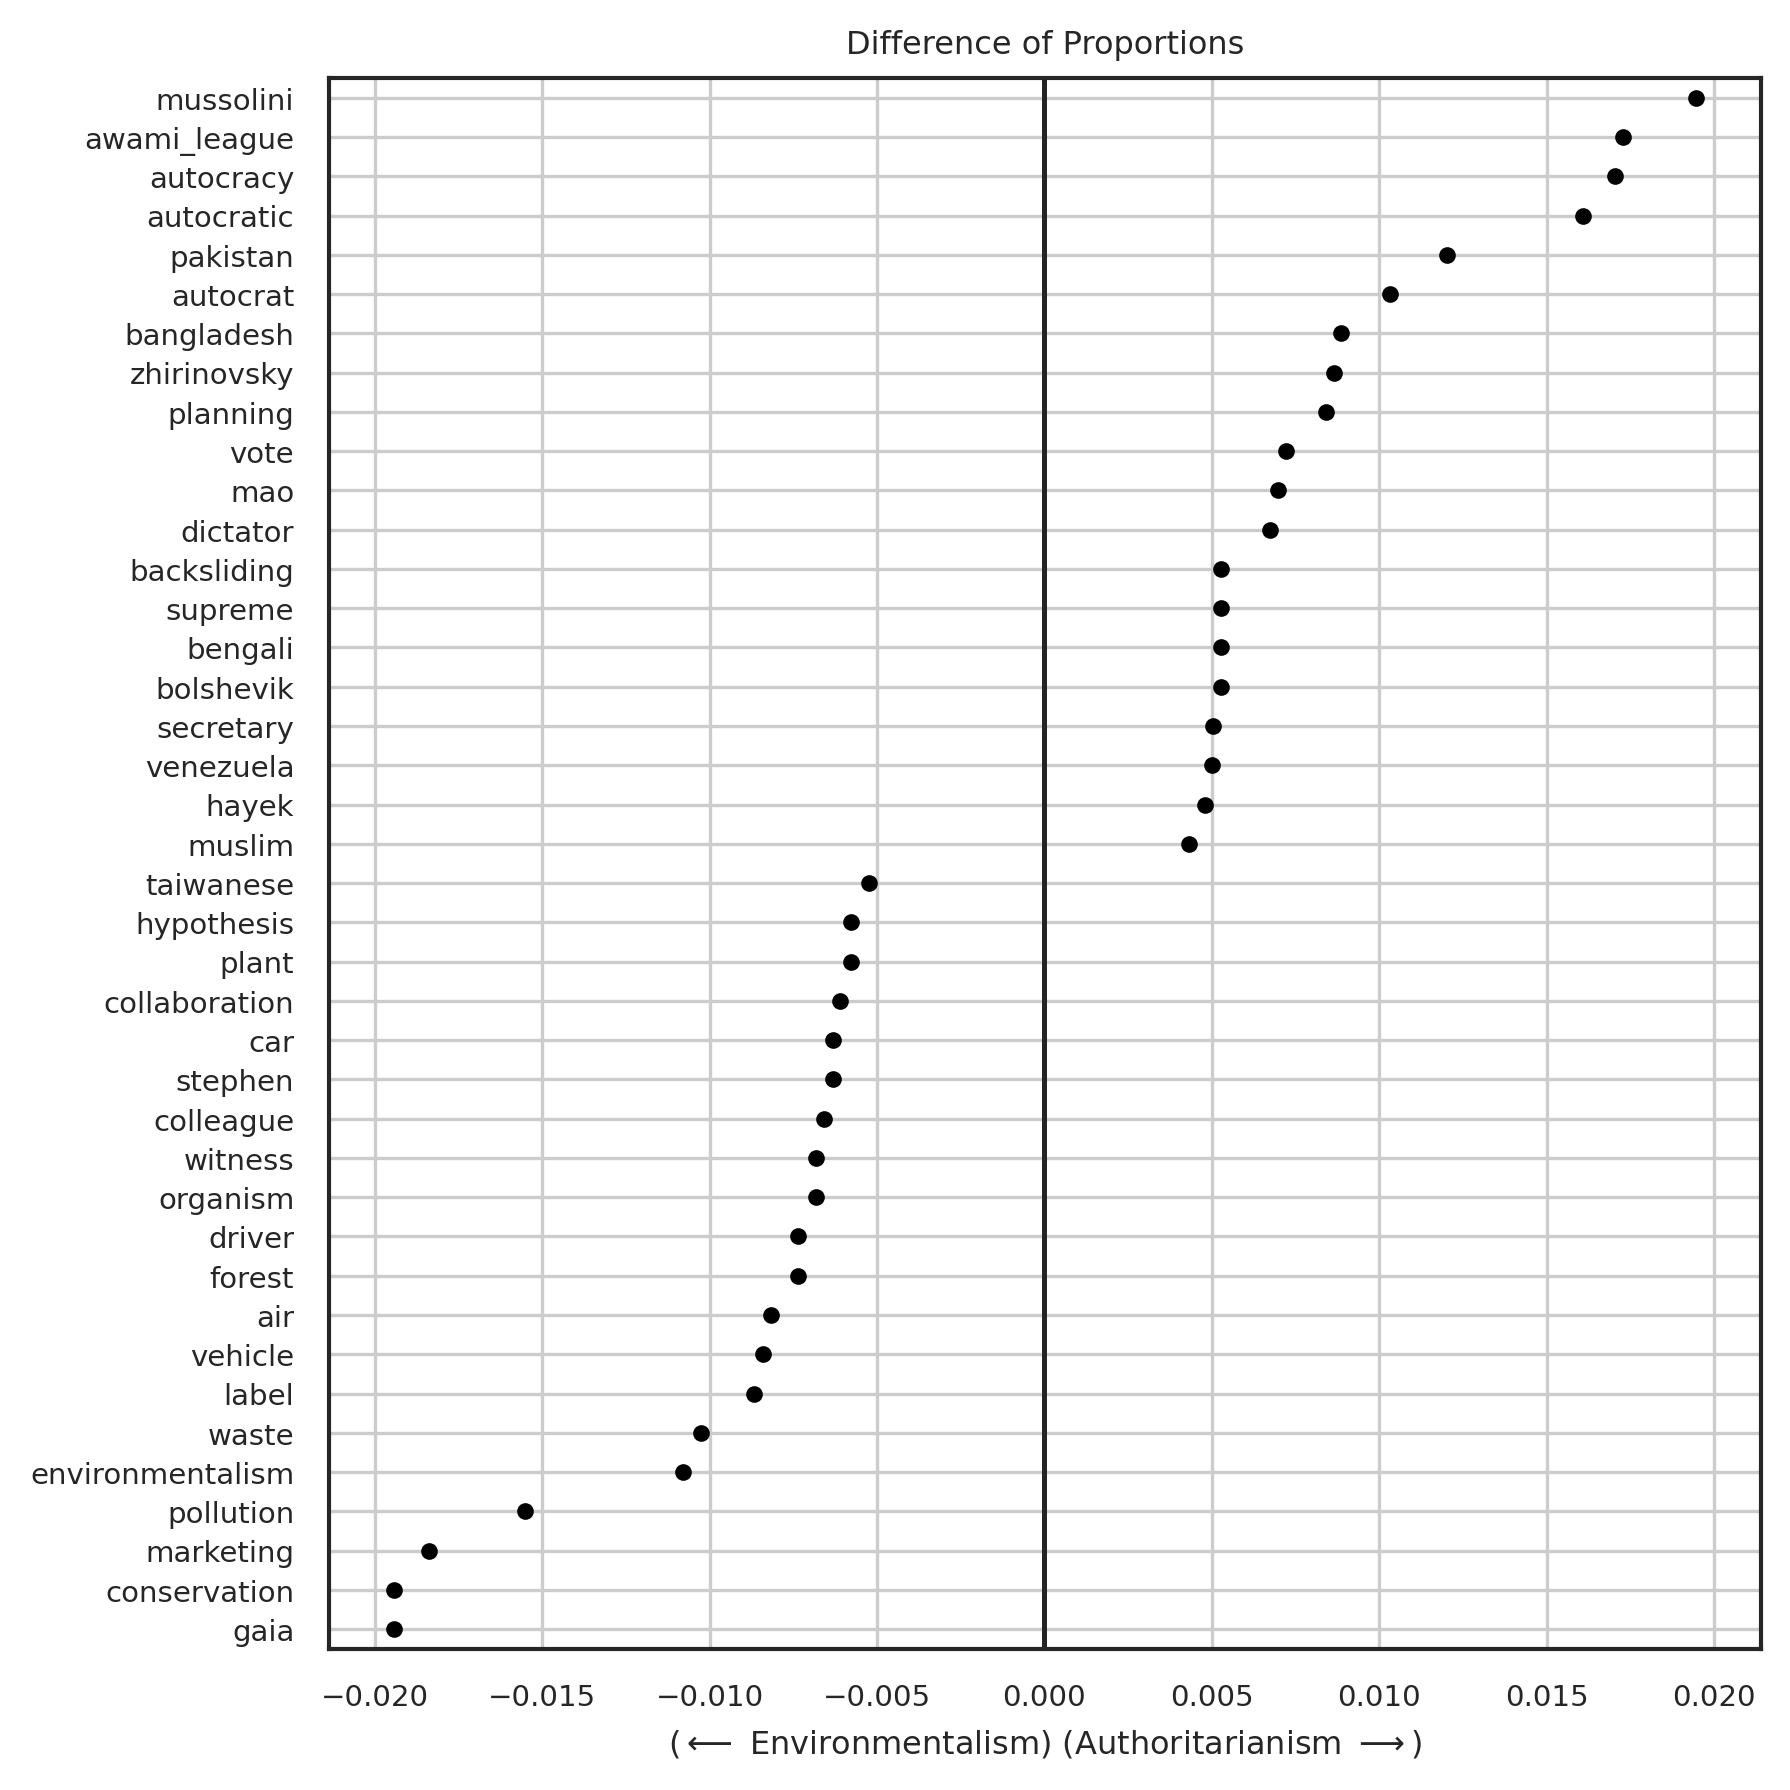

In [29]:
dop = pd.concat([auth_not_snp, env_not_snp])
fig, ax = plt.subplots(figsize= (6,6))
sns.swarmplot(x=dop, y=dop.index, color='black', size=4)
ax.axvline(0)
plt.grid()
ax.set(xlabel=r'($\longleftarrow$ Environmentalism) (Authoritarianism $\longrightarrow$)', ylabel='', title='Difference of Proportions')
plt.tight_layout()
plt.show()
fig.savefig("tabla_comparativa.png")